# Problem 3: Google Playstore Apps Dataset (63 points)

In [928]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [929]:
df = pd.read_excel("GooglePlaystore.xlsx")

## **Preprocessing**

### [3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record

In [930]:
#print(df.loc[df["Reviews"] == "3.0M"])

In [931]:
df.drop(df[df.Reviews=='3.0M'].index,inplace = True)

In [932]:
#print(df.loc[df["Reviews"] == "3.0M"])

### [4 pts] Remove rows where any of the columns has the value "Varies with device"

In [933]:
# Find the index list to drop based on given condition
list_to_kill = list(df.loc[df.eq("Varies with device").any(1)].index)
#kill em
df.drop(list_to_kill,inplace=True)

### [5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".


Possible input: '4.1 and up', '4.5.6 and up', '5.0-6.0'
Strategy: a) look for a digit , then a fullstop , then a digit and ignore everything else

In [934]:
df['Android Ver'] = df['Android Ver'].str.replace(r"^(\d\.\d).*",r"\1",regex=True).astype(float)

### [5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.


In [935]:
df['Installs'] = df['Installs'].str.replace(r"([\d,]*).+",r"\1",regex=True).str.replace(',','').astype(int)

### [5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [936]:
rating_dict = dict( df.groupby('Category')['Rating'].mean())

In [937]:
list_to_kill2 = list(df.loc[(df.Reviews<100)&(df.Installs<50000)&(df.Rating.isnull())].index)

In [938]:
df.drop(list_to_kill2,inplace=True)

In [939]:
#df.Rating = df.Rating.fillna(df.Category.apply(lambda x: rating_dict.get(x).round(2)))
df.Rating=df.Rating.fillna(df.Category.map(rating_dict).round(2))

### [6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400

In [940]:
def Converter(a):
    if 'M' in a:
        a = float(a.replace('M',''))
        return int(a*1000000)
    if 'K' in a:
        a = float(a.replace('K',''))
        return int(a*1000)
    

In [941]:
df.Size = df.Size.apply(Converter).astype('Int64')

## **Analysis**

### [4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [942]:
df.groupby('Category').describe()

Rating                                                    \
                      count      mean       std  min    25%   50%    75%  max   
Category                                                                        
ART_AND_DESIGN         59.0  4.358644  0.365322  3.2  4.100  4.40  4.700  5.0   
AUTO_AND_VEHICLES      62.0  4.146774  0.569935  2.1  3.900  4.25  4.500  4.9   
BEAUTY                 40.0  4.291750  0.356175  3.1  4.075  4.30  4.525  4.9   
BOOKS_AND_REFERENCE   147.0  4.320136  0.453084  2.7  4.100  4.40  4.600  5.0   
BUSINESS              246.0  4.119187  0.662586  1.0  3.825  4.30  4.500  5.0   
COMICS                 49.0  4.154082  0.550363  2.8  3.800  4.40  4.600  5.0   
COMMUNICATION         210.0  4.100952  0.502624  1.0  3.900  4.20  4.400  5.0   
DATING                174.0  3.957816  0.664204  1.0  3.600  4.10  4.400  5.0   
EDUCATION             110.0  4.392636  0.254395  3.5  4.300  4.40  4.600  4.9   
ENTERTAINMENT          86.0  4.145349  0.291308  3.0  4.000  4.20  4.300  4.7   
EVENTS                 36.0  4.474167  0.340037  3.7  4.300  4.50  4.725  5.0   
FAMILY               1611.0  4.189609  0.514460  1.0  4.000  4.30  4.500  5.0   
FINANCE               263.0  4.114068  0.683553  1.0  3.900  4.30  4.500  5.0   
FOOD_AND_DRINK         86.0  4.097674  0.573529  1.7  3.800  4.20  4.500  5.0   
GAME                  956.0  4.268588  0.378420  1.0  4.100  4.30  4.500  5.0   
HEALTH_AND_FITNESS    220.0  4.215455  0.696722  1.4  4.000  4.50  4.600  5.0   
HOUSE_AND_HOME         58.0  4.162414  0.376299  2.8  4.000  4.20  4.475  4.8   
LIBRARIES_AND_DEMO     68.0  4.202941  0.350254  3.1  4.000  4.20  4.400  5.0   
LIFESTYLE             280.0  4.093143  0.714612  1.5  3.800  4.20  4.600  5.0   
MAPS_AND_NAVIGATION    94.0  4.004255  0.556663  1.9  3.700  4.20  4.400  4.9   
MEDICAL               321.0  4.180374  0.676356  1.0  3.900  4.30  4.600  5.0   
NEWS_AND_MAGAZINES    171.0  4.141637  0.586858  1.7  3.950  4.30  4.500  5.0   
PARENTING              48.0  4.347917  0.397058  3.1  4.100  4.40  4.625  5.0   
PERSONALIZATION       277.0  4.322022  0.368190  2.5  4.100  4.40  4.600  5.0   
PHOTOGRAPHY           234.0  4.145726  0.512675  2.0  4.000  4.30  4.500  5.0   
PRODUCTIVITY          232.0  4.140690  0.581525  1.0  4.000  4.20  4.500  5.0   
SHOPPING              178.0  4.226404  0.439606  1.6  4.100  4.30  4.500  5.0   
SOCIAL                170.0  4.257059  0.484289  1.9  4.100  4.30  4.600  5.0   
SPORTS                248.0  4.204839  0.466767  1.5  4.000  4.30  4.500  5.0   
TOOLS                 633.0  4.010616  0.638232  1.0  3.800  4.20  4.400  5.0   
TRAVEL_AND_LOCAL      155.0  4.029677  0.556680  2.2  3.700  4.20  4.400  5.0   
VIDEO_PLAYERS         114.0  4.029211  0.593726  1.8  3.725  4.20  4.400  4.9   
WEATHER                49.0  4.242857  0.349404  3.3  4.000  4.30  4.500  4.8   

                       Size                ...    Installs                \
                      count          mean  ...         75%           max   
Category                                   ...                             
ART_AND_DESIGN         59.0  1.246102e+07  ...    300000.0  1.000000e+07   
AUTO_AND_VEHICLES      61.0  2.198197e+07  ...    500000.0  1.000000e+07   
BEAUTY                 40.0  1.477000e+07  ...    500000.0  5.000000e+06   
BOOKS_AND_REFERENCE   144.0  1.449653e+07  ...    500000.0  1.000000e+07   
BUSINESS              238.0  1.535588e+07  ...    500000.0  1.000000e+08   
COMICS                 47.0  1.384468e+07  ...    500000.0  5.000000e+06   
COMMUNICATION         185.0  1.417405e+07  ...   5000000.0  5.000000e+08   
DATING                174.0  1.827644e+07  ...    500000.0  1.000000e+07   
EDUCATION             108.0  2.125648e+07  ...   5000000.0  1.000000e+07   
ENTERTAINMENT          86.0  2.226512e+07  ...  10000000.0  1.000000e+08   
EVENTS                 35.0  1.364857e+07  ...    100000.0  1.000000e+06   
FAMILY               1590.0  3.056252e+0

### [11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:
Rating (gives top 3 most highly rated applications in each category)
Installs (gives top 3 most installed applications in each category)
Reviews (gives top 3 most reviewed applications in each category)
You don't need to do anything explicit to break ties.

Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column, as for instance:



In [943]:
df2 = df[df['Type']=='Free']

In [944]:
def top_3(df,val):
    ind = list(df[val].astype(float).nlargest(n=3).index)
    return df.loc[ind,:]

In [945]:
top_3(df2,'Rating')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37000000,1000,Free,0.0,Everyone,Comics,2018-06-26 00:00:00,2.0,4.0
612,American Girls Mobile Numbers,DATING,5.0,5.0,4400000,1000,Free,0.0,Mature 17+,Dating,2018-07-17 00:00:00,3.0,4.0
615,Awake Dating,DATING,5.0,2.0,70000000,100,Free,0.0,Mature 17+,Dating,2018-07-24 00:00:00,2.2.9,4.4


In [946]:
top_3(df2,'Installs')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264.0,76000000,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12 00:00:00,1.90.0,4.1
1700,Subway Surfers,GAME,4.5,27723193.0,76000000,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12 00:00:00,1.90.0,4.1
1750,Subway Surfers,GAME,4.5,27724094.0,76000000,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12 00:00:00,1.90.0,4.1


In [947]:
top_3(df2,'Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1879,Clash of Clans,GAME,4.6,44893888.0,98000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15 00:00:00,10.322.16,4.1
1670,Clash of Clans,GAME,4.6,44891723.0,98000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15 00:00:00,10.322.16,4.1
1704,Clash of Clans,GAME,4.6,44891723.0,98000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15 00:00:00,10.322.16,4.1


### [4 pts] Find the average, maximum and minimum price of the paid applications.

In [948]:
print("Average price:",df[df['Type']=='Paid']['Price'].mean())

Average price: 15.139163763066062


In [949]:
print("Average price:",df[df['Type']=='Paid']['Price'].max())

Average price: 400.0


In [950]:
print("Average price:",df[df['Type']=='Paid']['Price'].min())

Average price: 0.99


## **Visualization**

### [9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
Count the number of applications per genre and display it using a pie chart.
Hint: Read about DataFrame.explode()


In [951]:

li_of_li= list(df['Genres'].str.split(';'))

In [952]:
li = []
for item in li_of_li:
    li.extend(item)

In [959]:
pie_count = Counter(li)

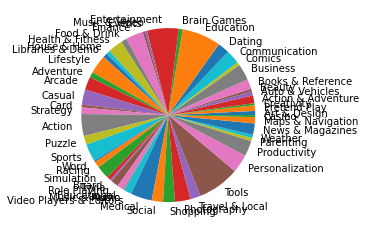

In [960]:
labels = [key for key in pie_count.keys()]
values = [int(value) for value in pie_count.values()]
plt.pie(values,labels = labels)
plt.show()

### [7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

In [969]:
business = list(df.loc[(df['Category']=='BUSINESS')]['Rating'])
education = list(df.loc[(df['Category']=='EDUCATION')]['Rating'])

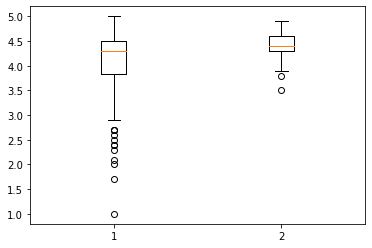

In [975]:
plt.boxplot([business,education])
plt.show()